In [283]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.interpolate import interp1d
from scipy.signal import find_peaks, barthann

In [284]:
def wind(timescale, data, w_freq):
    return data * np.exp(2 * np.pi * w_freq * timescale * 1.j)


In [285]:
def transform(x, y, freqs):
    ft = []
    for f in freqs:
        mapped = wind(x, y, f)
        re, im = np.real(mapped).mean(), np.imag(mapped).mean()
        mag = np.sqrt(re ** 2 + im ** 2)
        ft.append(mag)
    
    return np.array(ft)

In [351]:
def get_waves(parts, time):
    num_waves = len(parts)
    steps = len(time)
    waves = np.zeros((num_waves, steps))
    for i in range(num_waves):
        waves[i] = np.sin(parts[i] * 2 * np.pi * time)
    
    return waves
        
def decompose(time, data, freqs, threshold=None):
    powers   = transform(time, data, freqs)
    peaks, _ = find_peaks(powers, threshold=threshold)
    
    plt.plot(freqs, powers, 'b.--', label='Center of Mass')
    plt.plot(freqs[peaks], powers[peaks], 'ro', label='Peaks')
    plt.xlabel('Frequency')
    plt.legend(), plt.grid()
    plt.show()
    
    return get_waves(freqs[peaks], time)
           

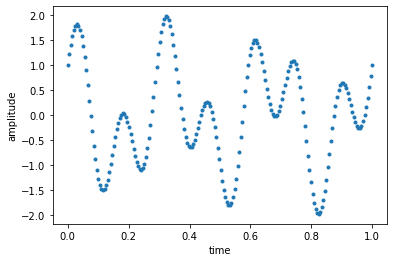

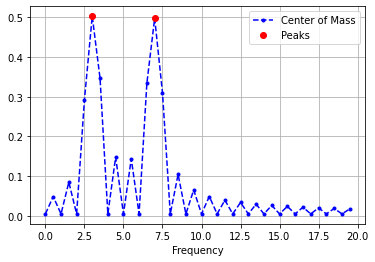

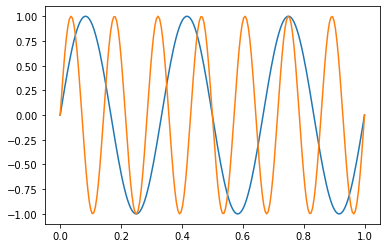

In [352]:
# sample data plot: sin with frequencey of 3 hz. 
f1 = 3
f2 = 7
x = np.linspace(0, 1, 200)
y = np.cos(f1 * 2 * np.pi * x) + np.sin(f2 * 2 * np.pi *x)

plt.plot(x, y, '.')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

freqs = np.arange(0, 20, .5)
waves = decompose(x, y, freqs, threshold=0.15)

for w in waves:
    plt.plot(x, w)
plt.show()

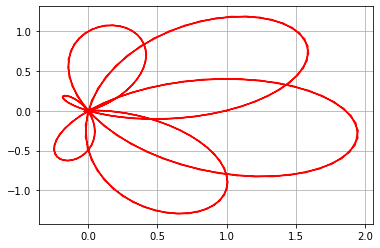

In [353]:
# Sample of wound data with winding frequeny of 3
mapped = wind(x, y, 3)
re, im = np.real(mapped), np.imag(mapped)
plt.plot(re, im, 'r')
plt.grid()